<h1><center>Sales Forecast by Facebook Prophet </center></h1>

<h3>Information regarding the database placed in the documentation</h3>

An Adidas sales dataset is a collection of data that includes information on the sales of Adidas products. This type of dataset may include details such as the number of units sold, the total sales revenue, the location of the sales, the type of product sold, and any other relevant information.

Adidas sales data can be useful for a variety of purposes, such as analyzing sales trends, identifying successful products or marketing campaigns, and developing strategies for future sales. It can also be used to compare Adidas sales to those of competitors, or to analyze the effectiveness of different marketing or sales channels.

There are a variety of sources that could potentially provide an Adidas sales dataset, including Adidas itself, market research firms, government agencies, or other organizations that track sales data. The specific data points included in an Adidas sales dataset may vary depending on the source and the purpose for which it is being used.

Source : https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset

<h3>Table of contents of the document</h3>
1) Libraries Imports;<br>
2) Data Loading;<br>
3) Data Cleaning;<br>
4) Data Analysis;<br>
5) Sales Forecasting Attempt;<br>
6) Conclusions.

<h3>Libraries Import</h3>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

<h3> Data Loading</h3>

In [80]:
df=pd.read_excel('C:\python\\Adidas US Sales Datasets.xlsx')
df.head()

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50     In-store  
1          150000.0              0.30     In-store  
2          140000.0              0.35     In-store  
3          133875.0              0.35     In-store  
4          162000.0              0.30     In-store

In [81]:
df.tail()

Retailer  Retailer ID Invoice Date     Region          State  \
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   

            City                  Product  Price per Unit  Units Sold  \
9643  Manchester            Men's Apparel            50.0          64   
9644  Manchester          Women's Apparel            41.0         105   
9645  Manchester    Men's Street Footwear            41.0         184   
9646  Manchester  Men's Athletic Footwear            42.0          70   
9647  Manchester  Women's Street Footwear            29.0          83   

      Total Sales  Operating Profit  Operating Margin Sales Method  
9643       3200.0            896.00              0.28       Outlet  
9644       4305.0           1377.60              0.32       Outlet  
9645       7544.0           2791.28              0.37       Outlet  
9646       2940.0           1234.80              0.42       Outlet  
9647       2407.0            649.89              0.27       Outlet

<h3>Data Cleaning</h3>

In [82]:
df.isna().sum() # we don't have any missing data

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [83]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [84]:
description = df.describe()
rounded_description = description.round()
rounded_description

Retailer ID  Price per Unit  Units Sold  Total Sales  Operating Profit  \
count       9648.0          9648.0      9648.0       9648.0            9648.0   
mean     1173850.0            45.0       257.0      93273.0           34425.0   
std        26360.0            15.0       214.0     141916.0           54193.0   
min      1128299.0             7.0         0.0          0.0               0.0   
25%      1185732.0            35.0       106.0       4254.0            1922.0   
50%      1185732.0            45.0       176.0       9576.0            4371.0   
75%      1185732.0            55.0       350.0     150000.0           52062.0   
max      1197831.0           110.0      1275.0     825000.0          390000.0   

       Operating Margin  
count            9648.0  
mean                0.0  
std                 0.0  
min                 0.0  
25%                 0.0  
50%                 0.0  
75%                 0.0  
max                 1.0

From the above information, we can determine the maximum, minimum, and average profit and sales. Additionally, we can learn that the most expensive product costs 110 dollars, the average is 45 dollars, and the minimum is 7 dollars.

In [85]:
#Adding date-year-month-day can facilitate operations on dates
df['year'] = pd.to_datetime(df['Invoice Date']).dt.year
df['month'] = pd.to_datetime(df['Invoice Date']).dt.month
df['day'] = pd.to_datetime(df['Invoice Date']).dt.day
df.head()

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  year  month  day  
0          300000.0              0.50     In-store  2020      1    1  
1          150000.0              0.30     In-store  2020      1    2  
2          140000.0              0.35     In-store  2020      1    3  
3          133875.0              0.35     In-store  2020      1    4  
4          162000.0              0.30     In-store  2020      1    5

<h3>Data Analysis</h3>

In [86]:
#Here is a set of cities for which we have data for analysis.
pd.Series(df["City"].unique())

0           New York
1            Houston
2      San Francisco
3        Los Angeles
4            Chicago
5             Dallas
6       Philadelphia
7          Las Vegas
8             Denver
9            Seattle
10             Miami
11       Minneapolis
12          Billings
13         Knoxville
14             Omaha
15        Birmingham
16          Portland
17         Anchorage
18          Honolulu
19           Orlando
20            Albany
21          Cheyenne
22          Richmond
23           Detroit
24         St. Louis
25    Salt Lake City
26       New Orleans
27             Boise
28           Phoenix
29       Albuquerque
30           Atlanta
31        Charleston
32         Charlotte
33          Columbus
34        Louisville
35           Jackson
36       Little Rock
37     Oklahoma City
38           Wichita
39       Sioux Falls
40             Fargo
41        Des Moines
42         Milwaukee
43      Indianapolis
44         Baltimore
45        Wilmington
46            Newark
47          H

In [87]:
# Which city generated the hightest operating profit 
df_cities = df.groupby('City', as_index=False)['Operating Profit'].sum() 
sorted_df_cities = df_cities.sort_values(by='Operating Profit', ascending=False)
sorted_df_cities

City  Operating Profit
10      Charleston       15607190.11
35        New York       13899973.16
31           Miami       12168619.11
42        Portland       10760799.37
46   San Francisco       10256249.56
22         Houston        9845141.06
11       Charlotte        9756422.87
0           Albany        9429850.91
34     New Orleans        9417233.49
6       Birmingham        9147581.39
28     Los Angeles        9044920.84
15          Dallas        8843063.29
39         Orlando        8757587.81
25       Knoxville        8493660.06
18         Detroit        8135894.02
7            Boise        8121115.10
44        Richmond        7719430.68
16          Denver        7713555.83
14        Columbus        7528840.09
26       Las Vegas        7060651.92
47         Seattle        6991403.13
3          Atlanta        6893289.61
1      Albuquerque        6738060.41
12        Cheyenne        6544071.15
24         Jackson        6369094.73
5         Billings        6232037.55
21        Honolulu        5849794.07
30      Manchester        5786206.43
9       Burlington        5785966.49
41         Phoenix        5344664.58
27     Little Rock        4915697.91
51      Wilmington        4524350.06
2        Anchorage        4498345.86
40    Philadelphia        4156739.25
20        Hartford        4152320.79
37   Oklahoma City        4106532.14
29      Louisville        3935830.23
13         Chicago        3920368.61
49       St. Louis        3907209.36
45  Salt Lake City        3873429.10
36          Newark        3657237.22
50         Wichita        3510147.29
23    Indianapolis        3379256.00
8           Boston        3353875.87
43      Providence        3045817.26
48     Sioux Falls        2943318.21
32       Milwaukee        2800830.09
4        Baltimore        2757642.12
19           Fargo        2688519.72
33     Minneapolis        2670229.76
17      Des Moines        2655217.37
38           Omaha        2439478.41

In [88]:
#The names of the products present in the dataset.
pd.Series(df["Product"].unique())

0        Men's Street Footwear
1      Men's Athletic Footwear
2      Women's Street Footwear
3    Women's Athletic Footwear
4                Men's Apparel
5              Women's Apparel
dtype: object

In [89]:
#The best-selling product.
df_product = df.groupby('Product', as_index=False)['Total Sales'].sum() 
sorted_df_product = df_product.sort_values(by='Total Sales', ascending=False)
sorted_df_product

Product  Total Sales
2      Men's Street Footwear  208826244.0
3            Women's Apparel  179038860.0
1    Men's Athletic Footwear  153673680.0
5    Women's Street Footwear  128002813.0
0              Men's Apparel  123728632.0
4  Women's Athletic Footwear  106631896.0

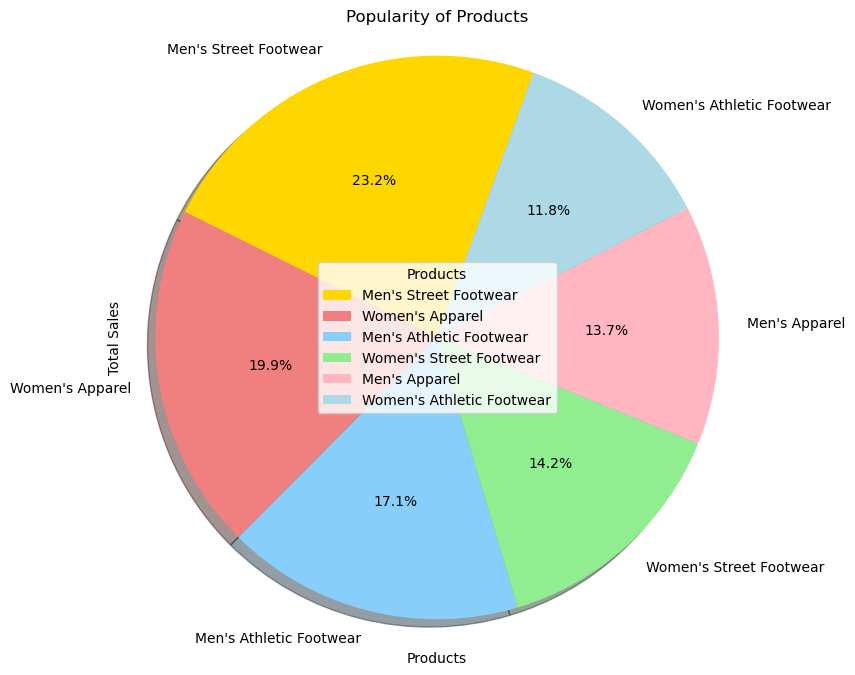

In [90]:
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightblue', 'lightseagreen']

plt.figure(figsize=(8, 8), dpi=100)

plt.pie(sorted_df_product["Total Sales"], labels=sorted_df_product["Product"], autopct='%1.1f%%', startangle=70, colors=colors, shadow=True, labeldistance=1.1)

plt.legend(sorted_df_product["Product"], title="Products", loc='center')

plt.title('Popularity of Products')
plt.xlabel('Products')
plt.ylabel('Total Sales')

plt.axis('equal')

plt.show()

In [91]:
#Which sellers are present in the database
pd.Series(df["Retailer"].unique())

0      Foot Locker
1          Walmart
2    Sports Direct
3        West Gear
4           Kohl's
5           Amazon
dtype: object

In [92]:
 # Which retailer has the highest sales
df_retailer = df.groupby('Retailer', as_index=False)['Total Sales'].sum()
sorted_df_retailer = df_retailer.sort_values(by='Total Sales', ascending=False)
sorted_df_retailer

Retailer  Total Sales
5      West Gear  242964333.0
1    Foot Locker  220094720.0
3  Sports Direct  182470997.0
2         Kohl's  102114753.0
0         Amazon   77698912.0
4        Walmart   74558410.0

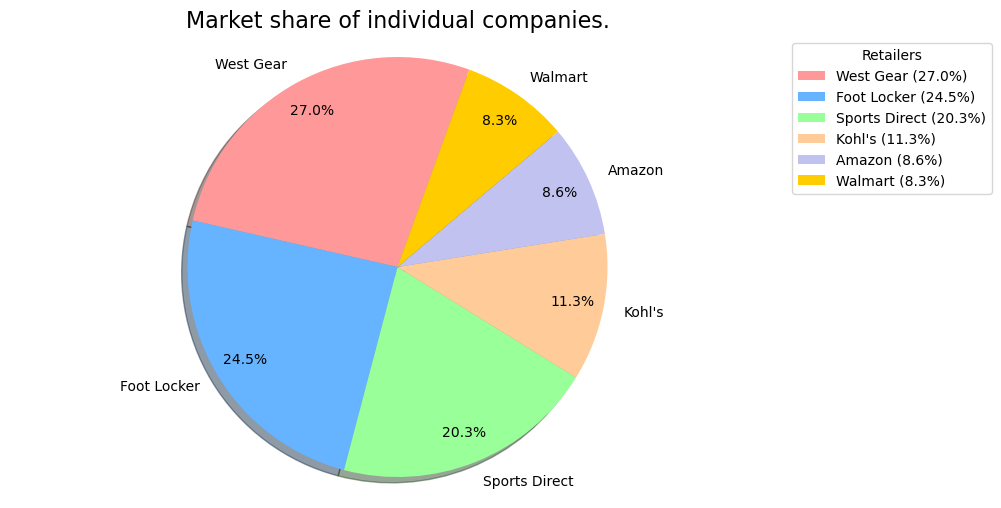

In [93]:
#Market share of individual companies.
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6', '#dfff80', '#ff0000']

max_sales_index = sorted_df_retailer['Total Sales'].idxmax()
colors[max_sales_index] = '#ffcc00'

plt.figure(figsize=(10, 6))

plt.pie(sorted_df_retailer["Total Sales"], labels=sorted_df_retailer["Retailer"], autopct='%1.1f%%', startangle=70, colors=colors, shadow=True, pctdistance=0.85)

legend_labels = [f'{label} ({sales:.1f}%)' for label, sales in zip(sorted_df_retailer["Retailer"], sorted_df_retailer["Total Sales"] / sum(sorted_df_retailer["Total Sales"]) * 100)]
plt.legend(legend_labels, title="Retailers", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.title('Market share of individual companies.', fontsize=16)

plt.show()


In [94]:
#Types of possible sales.
pd.Series(df["Sales Method"].unique())

0    In-store
1      Outlet
2      Online
dtype: object

In [95]:
#The popularity of individual types of sales.
df_method = df.groupby('Sales Method', as_index=False)['Total Sales'].sum() ### which method is most popular
sorted_df_method = df_method.sort_values(by='Total Sales', ascending=False)
sorted_df_method 

Sales Method  Total Sales
0     In-store  356643750.0
2       Outlet  295585493.0
1       Online  247672882.0

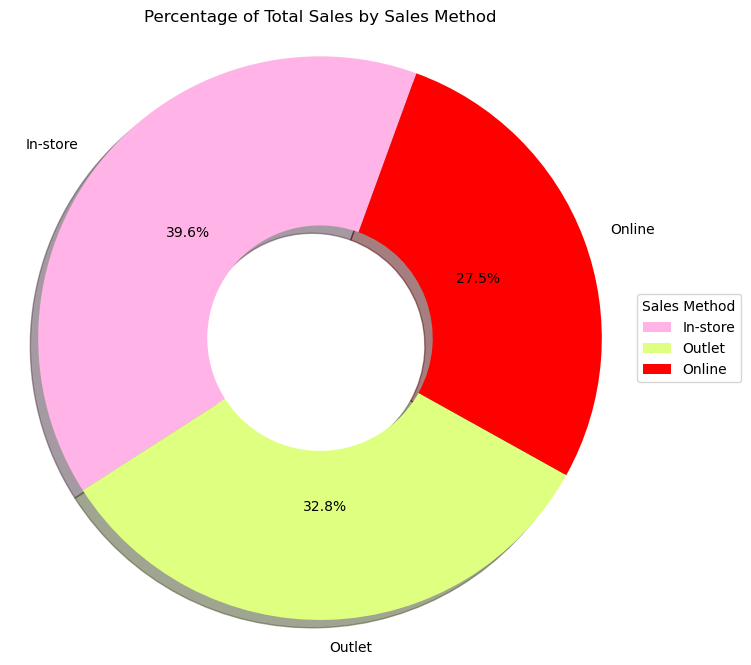

In [96]:
#Percentage of Total Sales by Sales Method
sales_methods = sorted_df_method["Sales Method"]
total_sales = sorted_df_method["Total Sales"]
colors = ['#ffb3e6', '#dfff80', '#ff0000']

total_sum = sum(total_sales)
percentages = [(sales / total_sum) * 100 for sales in total_sales]

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    percentages,
    labels=sales_methods,
    autopct='%1.1f%%',
    startangle=70,
    colors=colors,
    shadow=True,
    wedgeprops={'width': 0.6}
)
plt.axis('equal')

plt.legend(wedges, sales_methods, title="Sales Method", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Percentage of Total Sales by Sales Method')

plt.show()



In [97]:
# Group the data by region, state, and city
df_grouped = df.groupby(['Region', 'State', 'City'])

sales_by_location = df_grouped['Total Sales'].sum()
units_by_location = df_grouped['Units Sold'].sum()

print(sales_by_location)
print(units_by_location)

Region     State           City          
Midwest    Illinois        Chicago            9797488.0
           Indiana         Indianapolis       8836198.0
           Iowa            Des Moines         7424011.0
           Kansas          Wichita            9972864.0
           Michigan        Detroit           18625433.0
           Minnesota       Minneapolis        7378068.0
           Missouri        St. Louis          9683265.0
           Montana         Billings          15710886.0
           Nebraska        Omaha              5929038.0
           North Dakota    Fargo              7735580.0
           Ohio            Columbus          18484583.0
           South Dakota    Sioux Falls        8495576.0
           Wisconsin       Milwaukee          7727469.0
Northeast  Connecticut     Hartford          11573448.0
           Delaware        Wilmington        12298412.0
           Maine           Portland           9195978.0
           Maryland        Baltimore          7758059.0
      

In [98]:
# Picking 2 columns which are demand for Prophet
df_grouped = df.groupby('Invoice Date', as_index=False)['Total Sales'].sum()
df_grouped

Invoice Date  Total Sales
0     2020-01-01     845141.0
1     2020-01-02     689410.0
2     2020-01-03     632573.0
3     2020-01-04     615080.0
4     2020-01-05     707829.0
..           ...          ...
719   2021-12-27     602353.0
720   2021-12-28     301010.0
721   2021-12-29     211109.0
722   2021-12-30     167903.0
723   2021-12-31     198659.0

[724 rows x 2 columns]

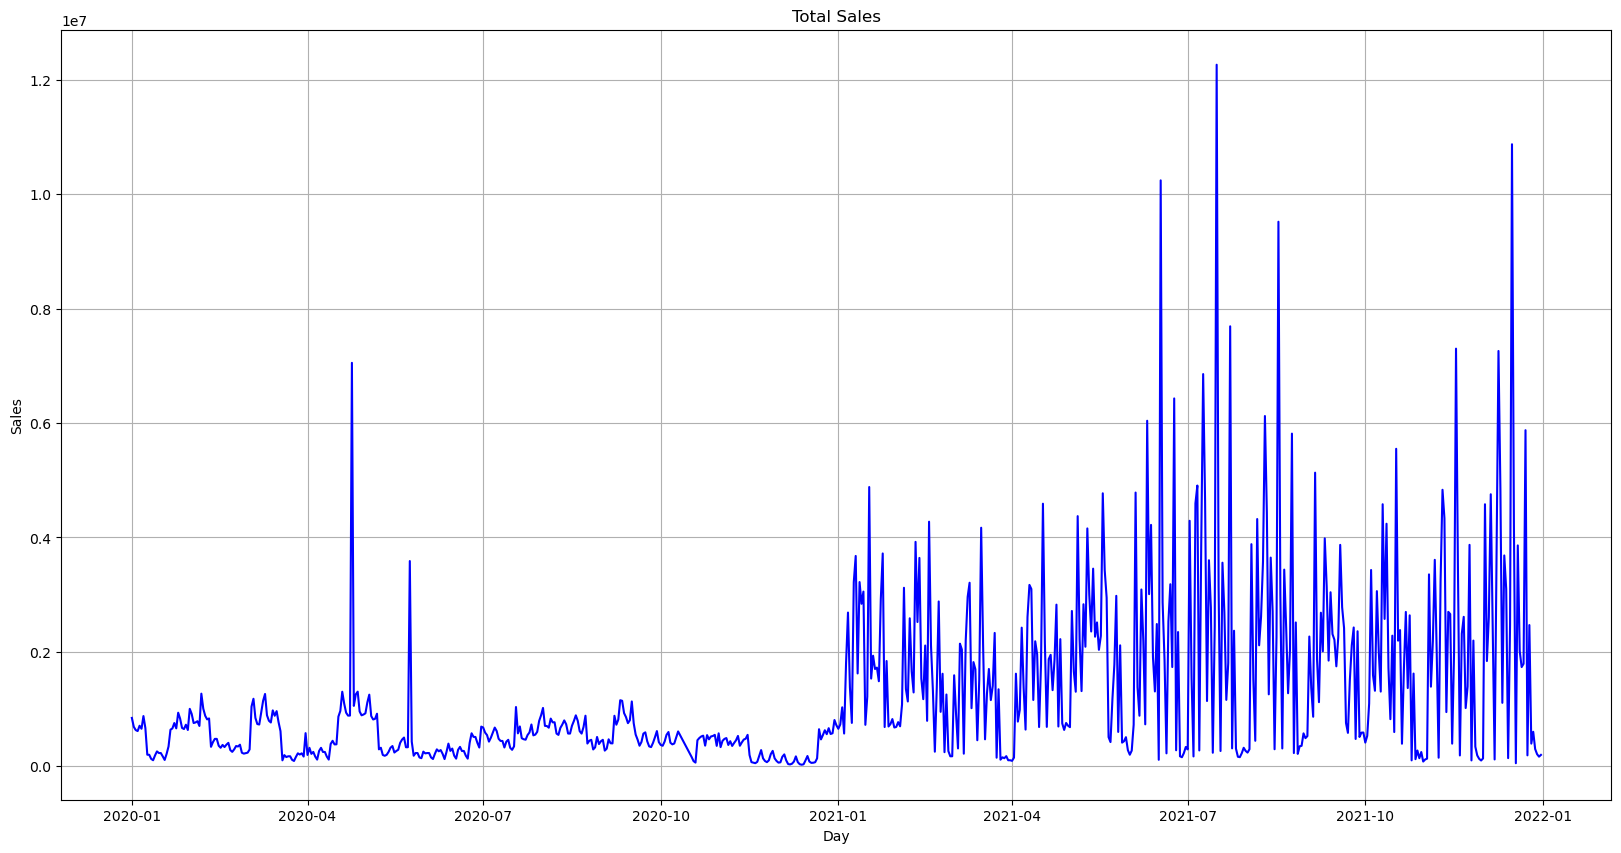

In [99]:
### Adidas total sales 

plt.figure(figsize=(20, 10))

plt.plot(df_grouped["Invoice Date"], df_grouped["Total Sales"], color='blue') 

plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Total Sales')

plt.grid(True)


In [101]:
df_grouped.tail()

Invoice Date  Total Sales
719   2021-12-27     602353.0
720   2021-12-28     301010.0
721   2021-12-29     211109.0
722   2021-12-30     167903.0
723   2021-12-31     198659.0

<h3>Sales Forecasting Attempt</h3>

In [37]:
# Changing name on "ds" and "y"[its obligatory for Prophet] 
df_grouped.rename(columns={'Invoice Date':'ds','Total Sales':'y'}, inplace= True) 
df_grouped

ds         y
0   2020-01-01  845141.0
1   2020-01-02  689410.0
2   2020-01-03  632573.0
3   2020-01-04  615080.0
4   2020-01-05  707829.0
..         ...       ...
719 2021-12-27  602353.0
720 2021-12-28  301010.0
721 2021-12-29  211109.0
722 2021-12-30  167903.0
723 2021-12-31  198659.0

[724 rows x 2 columns]

In [38]:
#An important step is optimizing the data sets by adding holidays, which are the times when sales decrease or are equal to 0.
First = pd.DataFrame({
  'holiday': 'First',
  'ds': pd.to_datetime(['2021-01-01','2020-01-01']),
  'lower_window': 0,
  'upper_window': 1,
})
Luther = pd.DataFrame({
  'holiday': 'Luther',
  'ds': pd.to_datetime(['2021-01-18','2020-01-20']),
  'lower_window': 0,
  'upper_window': 1,
})
President = pd.DataFrame({
  'holiday': 'President',
  'ds': pd.to_datetime(['2020-02-17','2020-02-15']),
  'lower_window': 0,
  'upper_window': 1,
})  
Memory = pd.DataFrame({
  'holiday': 'Memory',
  'ds': pd.to_datetime(['2021-05-31','2021-05-25']),
  'lower_window': 0,
  'upper_window': 1,
})   
Independence1 = pd.DataFrame({
  'holiday': 'Independence1',
  'ds': pd.to_datetime(['2021-07-03','2020-07-03']),
  'lower_window': 0,
  'upper_window': 1,
})
Independence2 = pd.DataFrame({
  'holiday': 'Independence2',
  'ds': pd.to_datetime(['2021-07-04','2020-07-04']),
  'lower_window': 0,
  'upper_window': 1,
})
Work = pd.DataFrame({
  'holiday': 'Work',
  'ds': pd.to_datetime(['2021-09-07','2020-09-06']),
  'lower_window': 0,
  'upper_window': 1,
})
Columbus = pd.DataFrame({
  'holiday': 'Columbus',
  'ds': pd.to_datetime(['2021-10-12','2020-10-11']),
  'lower_window': 0,
  'upper_window': 1,
})
Veteran = pd.DataFrame({
  'holiday': 'Veteran',
  'ds': pd.to_datetime(['2021-11-11','2020-11-11']),
  'lower_window': 0,
  'upper_window': 1,
})
Thanks = pd.DataFrame({
  'holiday': 'Thanks',
  'ds': pd.to_datetime(['2021-11-25','2020-11-26']),
  'lower_window': 0,
  'upper_window': 1,
})
Christmas = pd.DataFrame({
  'holiday': 'Christmas',
  'ds': pd.to_datetime(['2021-12-25','2020-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})
    
holidays = pd.concat((First,Luther,President,Memory,Independence1,Independence2,Work,Columbus,Veteran,Thanks,Christmas))

In [39]:
# Fitting our data into prophet
m = Prophet(holidays=holidays)
m.fit(df_grouped) 

14:04:15 - cmdstanpy - INFO - Chain [1] start processing
14:04:16 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
#Creating an annual forecast.
future = m.make_future_dataframe(periods=365)
future.tail(5)

ds
1084 2022-12-27
1085 2022-12-28
1086 2022-12-29
1087 2022-12-30
1088 2022-12-31

In [42]:
#Prediction table with deviations [min/max].
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds           yhat    yhat_lower    yhat_upper
0 2020-01-01   52418.795946 -1.505442e+06  1.806332e+06
1 2020-01-02  265678.869602 -1.453851e+06  1.814581e+06
2 2020-01-03  121339.433090 -1.550934e+06  1.715928e+06
3 2020-01-04  -63566.154272 -1.718030e+06  1.457387e+06
4 2020-01-05    1292.164396 -1.451990e+06  1.532708e+06

In [43]:
forecast.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2020-01-01  78308.690262 -1.505442e+06  1.806332e+06  78308.690262   
1 2020-01-02  80371.225294 -1.453851e+06  1.814581e+06  80371.225294   
2 2020-01-03  82433.760326 -1.550934e+06  1.715928e+06  82433.760326   
3 2020-01-04  84496.295358 -1.718030e+06  1.457387e+06  84496.295358   
4 2020-01-05  86558.830390 -1.451990e+06  1.532708e+06  86558.830390   

    trend_upper  Christmas  Christmas_lower  Christmas_upper  Columbus  ...  \
0  78308.690262        0.0              0.0              0.0       0.0  ...   
1  80371.225294        0.0              0.0              0.0       0.0  ...   
2  82433.760326        0.0              0.0              0.0       0.0  ...   
3  84496.295358        0.0              0.0              0.0       0.0  ...   
4  86558.830390        0.0              0.0              0.0       0.0  ...   

          weekly   weekly_lower   weekly_upper         yearly   yearly_lower  \
0 -100711.565104 -100711.565104 -100711.565104 -232972.350637 -232972.350637   
1  167061.003707  167061.003707  167061.003707 -182955.525360 -182955.525360   
2  168940.315357  168940.315357  168940.315357 -130034.642593 -130034.642593   
3  -73323.507443  -73323.507443  -73323.507443  -74738.942187  -74738.942187   
4  -67627.447964  -67627.447964  -67627.447964  -17639.218030  -17639.218030   

    yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0 -232972.350637                   0.0                         0.0   
1 -182955.525360                   0.0                         0.0   
2 -130034.642593                   0.0                         0.0   
3  -74738.942187                   0.0                         0.0   
4  -17639.218030                   0.0                         0.0   

   multiplicative_terms_upper           yhat  
0                         0.0   52418.795946  
1                         0.0  265678.869602  
2                         0.0  121339.433090  
3                         0.0  -63566.154272  
4                         0.0    1292.164396  

[5 rows x 55 columns]

In [44]:
forecast.tail()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
1084 2022-12-27  4.349683e+06  2.408327e+06  5.736079e+06  4.229054e+06   
1085 2022-12-28  4.354094e+06  2.115518e+06  5.489259e+06  4.233080e+06   
1086 2022-12-29  4.358505e+06  2.514089e+06  5.856747e+06  4.237106e+06   
1087 2022-12-30  4.362916e+06  2.680219e+06  5.719987e+06  4.241134e+06   
1088 2022-12-31  4.367327e+06  2.459746e+06  5.666587e+06  4.244891e+06   

       trend_upper  Christmas  Christmas_lower  Christmas_upper  Columbus  \
1084  4.463964e+06        0.0              0.0              0.0       0.0   
1085  4.468843e+06        0.0              0.0              0.0       0.0   
1086  4.473716e+06        0.0              0.0              0.0       0.0   
1087  4.478590e+06        0.0              0.0              0.0       0.0   
1088  4.483463e+06        0.0              0.0              0.0       0.0   

      ...         weekly   weekly_lower   weekly_upper         yearly  \
1084  ...   79951.459748   79951.459748   79951.459748 -418120.379602   
1085  ... -100711.565104 -100711.565104 -100711.565104 -387276.823481   
1086  ...  167061.003707  167061.003707  167061.003707 -351871.367757   
1087  ...  168940.315358  168940.315358  168940.315358 -312112.576282   
1088  ...  -73323.507443  -73323.507443  -73323.507443 -268289.816683   

       yearly_lower   yearly_upper  multiplicative_terms  \
1084 -418120.379602 -418120.379602                   0.0   
1085 -387276.823481 -387276.823481                   0.0   
1086 -351871.367757 -351871.367757                   0.0   
1087 -312112.576282 -312112.576282                   0.0   
1088 -268289.816683 -268289.816683                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
1084                         0.0                         0.0  4.011514e+06  
1085                         0.0                         0.0  3.866106e+06  
1086                         0.0                         0.0  4.173695e+06  
1087                         0.0                         0.0  4.219744e+06  
1088                         0.0                         0.0  4.025714e+06  

[5 rows x 55 columns]

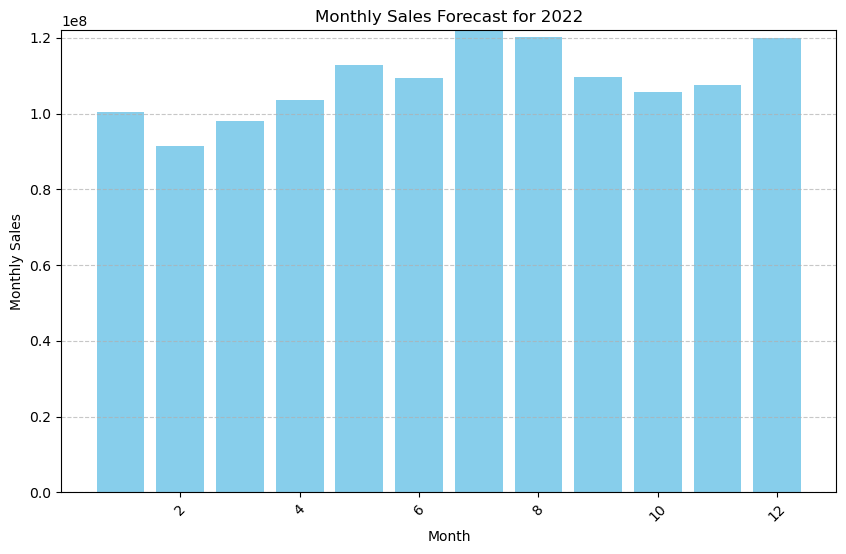

In [103]:
forecast_2021 = forecast.loc[forecast['ds'] >= '2021-12-31', ['ds', 'yhat']]
forecast_2021['ds'] = pd.to_datetime(forecast_2021['ds'])
forecast_2021['Month'] = forecast_2021['ds'].dt.to_period('M')
monthly_sales = forecast_2021.groupby('Month')['yhat'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.month

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['yhat'], color='skyblue')

plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Forecast for 2022')

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(monthly_sales['yhat']) + 100) 

plt.show()





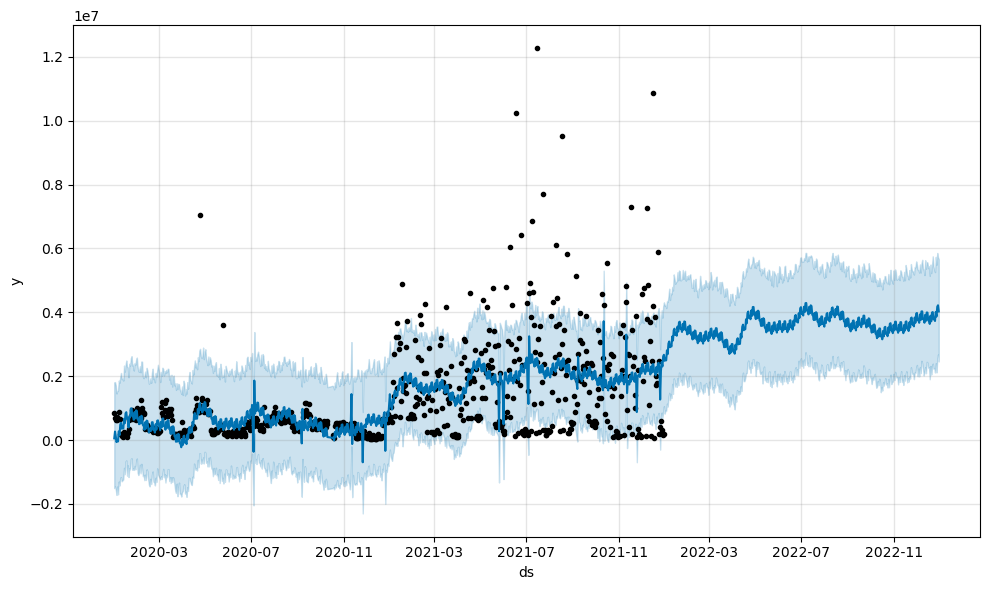

In [45]:
fig1 = m.plot(forecast)

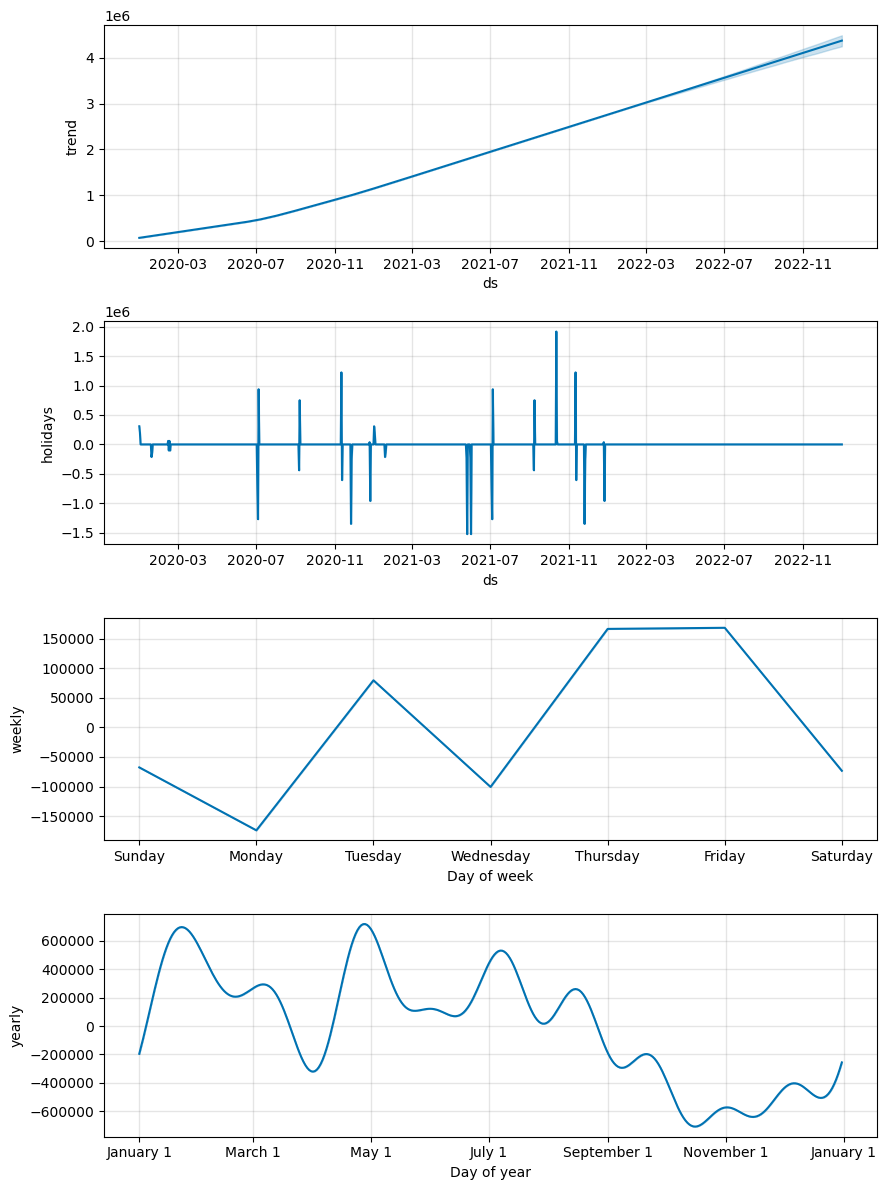

In [46]:
fig2 = m.plot_components(forecast)


In [47]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [48]:
plot_components_plotly(m, forecast)

C:\Users\A2424211\AppData\Local\miniconda3\lib\site-packages\prophet\plot.py:870: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



<h3>Conclusions based on the analysis of the provided file are as follows:</h3>

The analysis encompassed various stages, including:

<b>Libraries Imports:</b> The required libraries were imported to facilitate data analysis and visualization.

<b>Data Loading:</b> Data was successfully loaded from the source, providing a foundation for subsequent analysis.

<b>Data Cleaning:</b> Data cleaning was performed to handle missing values, duplicates, or any other data quality issues.

<b>Data Analysis:</b> Initial data exploration was conducted by using "info" and "describe" methods to gain a basic understanding of the dataset.

<b>Sales Forecasting Attempt:</b> A sales forecasting attempt was made, incorporating historical sales data and considering holidays as potential influencing factors.

<b>Conclusions:</b> The analysis led to the following key findings:

<i>Cities in Analysis</i>: The analysis identified which cities were included in the dataset, enabling geographical insights.

<i>Most Profitable City:</i> The city generating the highest profit was determined, providing insights into the most lucrative location.

<i>Product Types:</i> Different product types were identified, aiding in understanding the product portfolio.

<i>Best-Selling Product:</i> The product with the highest sales was determined, providing valuable information for inventory management and marketing efforts.

<i>Top Retailers:</i> The most popular retailers were identified, which could be useful for building stronger partnerships or optimizing distribution.

<i>Sales Types:</i> The various types of sales were analyzed, offering insights into sales channels and strategies.

<i>Data Visualization:</i> Data was visualized through charts to better convey information and trends.

<i>Sales Forecast:</i> A sales forecast was generated, considering historical sales data and accounting for holiday effects. This forecast was visualized through charts, allowing stakeholders to anticipate future sales patterns.

In summary, the analysis provided valuable insights into the dataset, including information about cities, profitability, product types, top-selling products, prominent retailers, sales types, and sales forecasting. These findings can be utilized to make data-driven decisions, refine strategies, and optimize business operations.